### TEAM NAME : HIRAMANI JSN 
### TRACK NO : 6
### TRACK NAME : AI_CITY_LLC
### TEAM MEMBERS:
                #### DEDANI VIVEK
                #### SAHAJ SONI
                #### DHRUV PRAJAPATI
                #### SURAJ MODI
                #### PARTH PATEL

In [1]:
#imporing libraries
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("jorex_origional.csv")

C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


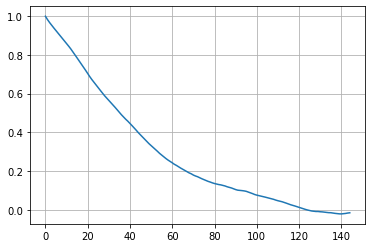

In [26]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf

acf_144 = acf(df["1_USD="], nlags=144)
plt.plot(acf_144)
plt.grid()


In [27]:
# as we have the time series dataset we have to know that 
# the given dataset is stationary or not?
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df1)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")


pvalue =  0.5662789937246224  if above 0.05, data is not stationary


In [3]:
df1=df.reset_index()['1_USD=']

In [4]:
df1

0      71.16500
1      71.34800
2      71.75350
3      71.76100
4      71.76100
         ...   
889    78.25250
890    78.44765
891    79.00335
892    78.92340
893    78.96205
Name: 1_USD=, Length: 894, dtype: float64

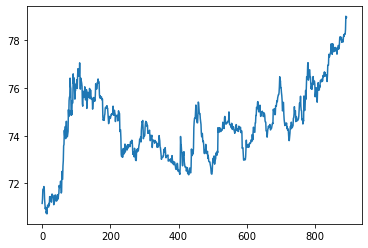

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\vivek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
print(df1)

[[0.05315069]
 [0.07525654]
 [0.12423973]
 [0.12514571]
 [0.12514571]
 [0.13843338]
 [0.1336015 ]
 [0.07785368]
 [0.05170112]
 [0.02566937]
 [0.03213201]
 [0.03189041]
 [0.00338232]
 [0.01540162]
 [0.        ]
 [0.02966775]
 [0.04481569]
 [0.03849801]
 [0.03849801]
 [0.03472914]
 [0.05369427]
 [0.04548008]
 [0.0875416 ]
 [0.06982068]
 [0.07253861]
 [0.07253861]
 [0.08818182]
 [0.05955293]
 [0.07791408]
 [0.10056352]
 [0.09361769]
 [0.09349689]
 [0.09349689]
 [0.07549814]
 [0.04650685]
 [0.05601358]
 [0.05967373]
 [0.09265131]
 [0.09555044]
 [0.09555044]
 [0.06764633]
 [0.06571358]
 [0.07073873]
 [0.0664142 ]
 [0.09373849]
 [0.09686713]
 [0.09686713]
 [0.07555854]
 [0.09838917]
 [0.10412703]
 [0.14399005]
 [0.1337827 ]
 [0.14042653]
 [0.14042653]
 [0.16585431]
 [0.13258681]
 [0.10569739]
 [0.11113326]
 [0.21501869]
 [0.17515568]
 [0.17515568]
 [0.24219802]
 [0.26998134]
 [0.3442111 ]
 [0.35151932]
 [0.42278957]
 [0.39625046]
 [0.39625046]
 [0.44211709]
 [0.380873  ]
 [0.40587798]
 [0.46

In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:

training_size,test_size

(581, 313)

In [10]:
train_data

array([[0.05315069],
       [0.07525654],
       [0.12423973],
       [0.12514571],
       [0.12514571],
       [0.13843338],
       [0.1336015 ],
       [0.07785368],
       [0.05170112],
       [0.02566937],
       [0.03213201],
       [0.03189041],
       [0.00338232],
       [0.01540162],
       [0.        ],
       [0.02966775],
       [0.04481569],
       [0.03849801],
       [0.03849801],
       [0.03472914],
       [0.05369427],
       [0.04548008],
       [0.0875416 ],
       [0.06982068],
       [0.07253861],
       [0.07253861],
       [0.08818182],
       [0.05955293],
       [0.07791408],
       [0.10056352],
       [0.09361769],
       [0.09349689],
       [0.09349689],
       [0.07549814],
       [0.04650685],
       [0.05601358],
       [0.05967373],
       [0.09265131],
       [0.09555044],
       [0.09555044],
       [0.06764633],
       [0.06571358],
       [0.07073873],
       [0.0664142 ],
       [0.09373849],
       [0.09686713],
       [0.09686713],
       [0.075

In [11]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(480, 100)
(480,)


(None, None)

In [14]:

print(X_test.shape), print(ytest.shape)

(212, 100)
(212,)


(None, None)

In [15]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 6s 271ms/step - loss: 0.0691 - val_loss: 0.0135
Epoch 2/100
8/8 [==============================] - 1s 142ms/step - loss: 0.0117 - val_loss: 0.0580
Epoch 3/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 4/100
8/8 [==============================] - 1s 135ms/step - loss: 0.0066 - val_loss: 0.0253
Epoch 5/100
8/8 [==============================] - 1s 134ms/step - loss: 0.0054 - val_loss: 0.0147
Epoch 6/100
8/8 [==============================] - 1s 135ms/step - loss: 0.0048 - val_loss: 0.0150
Epoch 7/100
8/8 [==============================] - 1s 134ms/step - loss: 0.0045 - val_loss: 0.0121
Epoch 8/100
8/8 [==============================] - 1s 134ms/step - loss: 0.0042 - val_loss: 0.0110
Epoch 9/100
8/8 [==============================] - 1s 142ms/step - loss: 0.0040 - val_loss: 0.0077
Epoch 10/100
8/8 [==============================] - 1s 134ms/step - loss: 0.0038 - val_loss: 0.0104
Epoch 11/

In [21]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

73.73604416010126

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

75.40547869239906

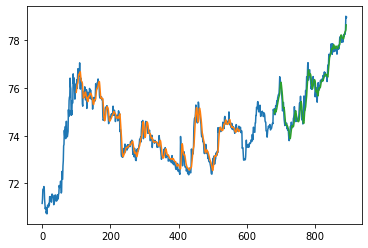

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label="input data")
plt.plot(trainPredictPlot,label="")
plt.plot(testPredictPlot)
plt.show()

## predicting for next 6 mounths

In [16]:
df2=pd.read_csv("test_forex.csv")

In [17]:
len(df2)

183

In [18]:
len(test_data)

313

In [19]:
x_input=test_data[213:].reshape(1,-1)
x_input.shape

(1, 100)

In [20]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [21]:
temp_input

[0.6533185960970478,
 0.6948969299437682,
 0.6710999172540433,
 0.6690886468921953,
 0.6716918226458173,
 0.6716918226458173,
 0.6543574504581233,
 0.5925093768685787,
 0.6114141102997586,
 0.6263144225600517,
 0.6383035266689632,
 0.6366606872142402,
 0.5707296743916377,
 0.5651005333188373,
 0.6287001636799605,
 0.6283860914312651,
 0.6643232045033134,
 0.6272385197533339,
 0.6272385197533339,
 0.6265137376409555,
 0.6492235771621164,
 0.6411905754165996,
 0.6724770032675593,
 0.676976692215236,
 0.6772605652092505,
 0.6772605652092505,
 0.668212868506405,
 0.6825816738842878,
 0.6718246993664216,
 0.6728273146218751,
 0.7001395205566325,
 0.6946432562044365,
 0.6946432562044365,
 0.702531301527479,
 0.718367790682926,
 0.6958995451992251,
 0.7155049013390364,
 0.699831488158873,
 0.7004173536997111,
 0.7004173536997111,
 0.6999220859229194,
 0.7044761335290239,
 0.6697349109423989,
 0.7004717123581408,
 0.7522755138403188,
 0.752565426685269,
 0.752565426685269,
 0.8073468746791335,

In [36]:
# demonstrate prediction for next 6 MOUNTHS
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<len(df2)):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9986594]
101
1 day input [0.69489693 0.67109992 0.66908865 0.67169182 0.67169182 0.65435745
 0.59250938 0.61141411 0.62631442 0.63830353 0.63666069 0.57072967
 0.56510053 0.62870016 0.62838609 0.6643232  0.62723852 0.62723852
 0.62651374 0.64922358 0.64119058 0.672477   0.67697669 0.67726057
 0.67726057 0.66821287 0.68258167 0.6718247  0.67282731 0.70013952
 0.69464326 0.69464326 0.7025313  0.71836779 0.69589955 0.7155049
 0.69983149 0.70041735 0.70041735 0.69992209 0.70447613 0.66973491
 0.70047171 0.75227551 0.75256543 0.75256543 0.80734687 0.79317738
 0.79486854 0.802213   0.8112909  0.81676904 0.81676904 0.86037677
 0.81821861 0.84521674 0.80746767 0.86101095 0.85688573 0.85688573
 0.82051375 0.82225323 0.82394439 0.83951512 0.83447185 0.84161699
 0.84161699 0.82323168 0.8339041  0.82723006 0.80818641 0.8402701
 0.83223106 0.83223106 0.85224109 0.83597577 0.83561338 0.85722396
 0.88881238 0.89613268 0.89613268 0.88947677 0.88064651 0.89297988
 0.86816213 0.88096058 0.87293966 0.

In [22]:
import matplotlib.pyplot as plt
lst_output1=[[0.9986593723297119], [1.008161187171936], [1.014209508895874], [1.0191673040390015], [1.0239112377166748], [1.0287418365478516], [1.0337917804718018], [1.039138913154602], [1.0448236465454102], [1.050853967666626], [1.0572108030319214], [1.063857078552246], [1.0707449913024902], [1.0778244733810425], [1.0850462913513184], [1.0923669338226318], [1.0997487306594849], [1.1071631908416748], [1.1145877838134766], [1.122007131576538], [1.129410982131958], [1.1367934942245483], [1.144152283668518], [1.151485800743103], [1.1587941646575928], [1.1660774946212769], [1.1733359098434448], [1.1805683374404907], [1.1877739429473877], [1.1949505805969238], [1.2020961046218872], [1.20920729637146], [1.2162811756134033], [1.2233140468597412], [1.230302333831787], [1.237242579460144], [1.2441319227218628], [1.2509666681289673], [1.257743239402771], [1.2644597291946411], [1.2711135149002075], [1.277701497077942], [1.2842222452163696], [1.290672779083252], [1.2970523834228516], [1.303358793258667], [1.309590458869934], [1.3157463073730469], [1.3218249082565308], [1.327824592590332], [1.3337451219558716], [1.3395850658416748], [1.3453434705734253], [1.3510199785232544], [1.3566139936447144], [1.3621245622634888], [1.3675514459609985], [1.372894287109375], [1.3781534433364868], [1.3833280801773071], [1.3884178400039673], [1.3934236764907837], [1.398344874382019], [1.4031822681427002], [1.4079358577728271], [1.4126055240631104], [1.4171922206878662], [1.4216961860656738], [1.426118016242981], [1.4304579496383667], [1.4347165822982788], [1.4388949871063232], [1.4429936408996582], [1.4470131397247314], [1.4509541988372803], [1.4548180103302002], [1.4586045742034912], [1.462315559387207], [1.4659514427185059], [1.4695135354995728], [1.4730024337768555], [1.4764187335968018], [1.4797639846801758], [1.4830384254455566], [1.4862444400787354], [1.4893816709518433], [1.4924519062042236], [1.4954555034637451], [1.4983940124511719], [1.5012681484222412], [1.5040788650512695], [1.5068281888961792], [1.5095157623291016], [1.5121433734893799], [1.5147122144699097], [1.5172230005264282], [1.5196764469146729], [1.5220743417739868], [1.5244171619415283], [1.526706337928772], [1.5289422273635864], [1.5311264991760254], [1.5332597494125366], [1.5353434085845947], [1.5373778343200684], [1.5393646955490112], [1.541304588317871], [1.5431983470916748], [1.5450469255447388], [1.546851396560669], [1.548612356185913], [1.5503309965133667], [1.5520087480545044], [1.5536454916000366], [1.555242657661438], [1.5568010807037354], [1.5583215951919556], [1.5598042011260986], [1.5612515211105347], [1.5626626014709473], [1.5640389919281006], [1.5653815269470215], [1.5666909217834473], [1.5679676532745361], [1.5692131519317627], [1.5704272985458374], [1.5716112852096558], [1.572765588760376], [1.573891043663025], [1.5749880075454712], [1.5760575532913208], [1.5771002769470215], [1.578116536140442], [1.5791075229644775], [1.5800726413726807], [1.5810140371322632], [1.581931471824646], [1.5828255414962769], [1.5836970806121826], [1.5845457315444946], [1.5853731632232666], [1.5861793756484985], [1.5869649648666382], [1.5877306461334229], [1.5884766578674316], [1.5892030000686646], [1.5899111032485962], [1.5906010866165161], [1.591273546218872], [1.5919278860092163], [1.5925655364990234], [1.593186378479004], [1.5937923192977905], [1.594381332397461], [1.5949562788009644], [1.5955153703689575], [1.5960601568222046], [1.5965906381607056], [1.5971078872680664], [1.5976113080978394], [1.5981017351150513], [1.5985791683197021], [1.5990444421768188], [1.5994974374771118], [1.5999385118484497], [1.6003682613372803], [1.600786566734314], [1.601193904876709], [1.6015907526016235], [1.6019771099090576], [1.6023534536361694], [1.6027194261550903], [1.6030762195587158], [1.6034234762191772], [1.6037614345550537], [1.6040912866592407], [1.6044114828109741], [1.6047240495681763], [1.6050277948379517], [1.6053240299224854], [1.6056121587753296], [1.6058926582336426], [1.6061660051345825]]

In [23]:
day_new=np.arange(1,893)
day_pred=np.arange(894,1206)

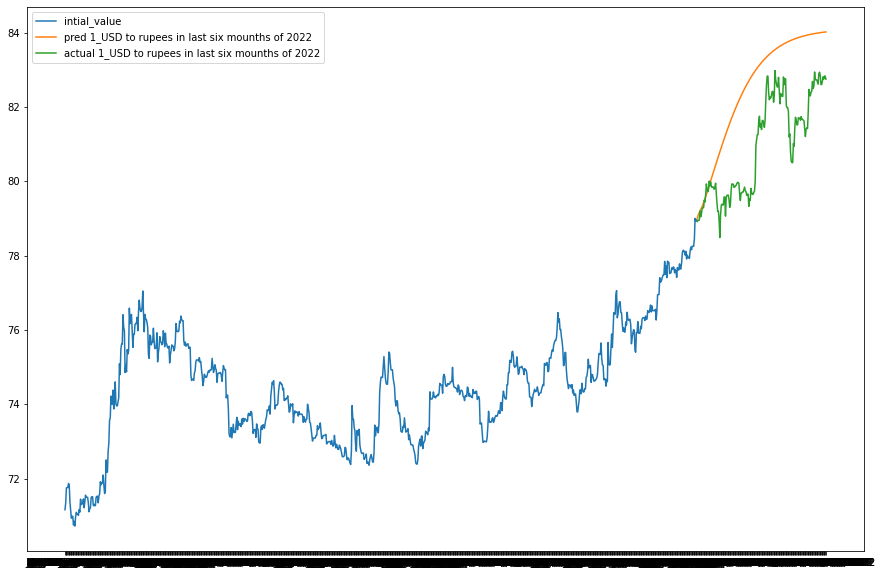

In [24]:
plt.figure(figsize=(15,10))
plt.plot(df["Date"],df["1_USD="],label="intial_value")
plt.plot(df2["Date"],scaler.inverse_transform(lst_output1),label="pred 1_USD to rupees in last six mounths of 2022")
plt.plot(df2["Date"],df2["Price"],label="actual 1_USD to rupees in last six mounths of 2022")
plt.legend()
plt.show()